# Задание

1. Возьмите задачу с винами (https://www.kaggle.com/rajyellow46/wine-quality) и решите ее, оформив в виде CrispDM-подхода. Решение - jupyter notebook на github или colab.
2. ! Только для тех у кого уже диплом ! Оформите задачи по дипломной работе в виде этапов CrispDM (например, в trello). Пришлите скриншот.

In [ ]:
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import MinMaxScaler

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

In [ ]:
df = pd.read_csv('winequalityN.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


**Информация об атрибутах:**

**Входные переменные (на основе физико-химических тестов):**
- фиксированная кислотность
- летучая кислотность
- лимонная кислота
- остаточный сахар
- хлориды
- свободный диоксид серы
- диоксид серы общий
- плотность
- рН
- сульфаты
- алкоголь

**Выходная переменная:**
- качество (оценка от 0 до 10)

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


Посмотрим на корреляцию качество и содержание алкоголя

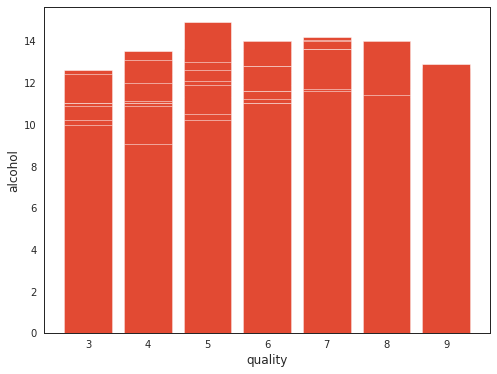

In [ ]:
plt.bar(df['quality'],df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

<Figure size 576x432 with 0 Axes>

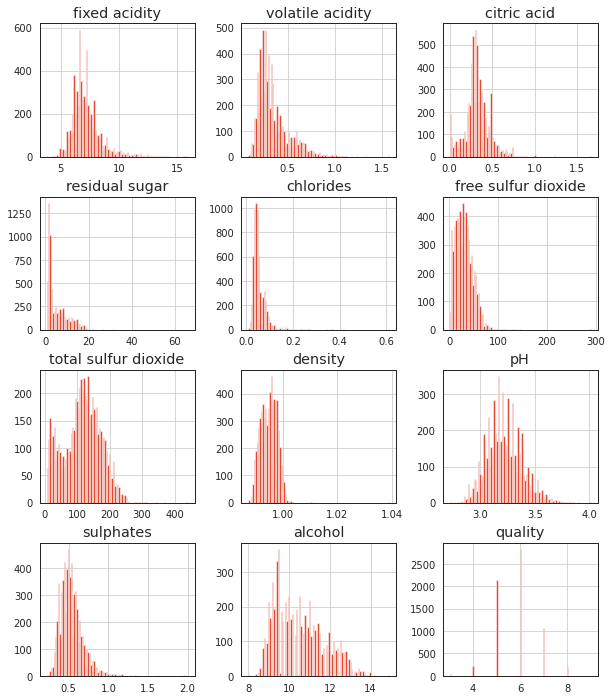

In [ ]:
plt.tight_layout()
df.hist(bins = 100, figsize = (10,12))
plt.show()

Чем больше содержание алкоголя, тем выше качество

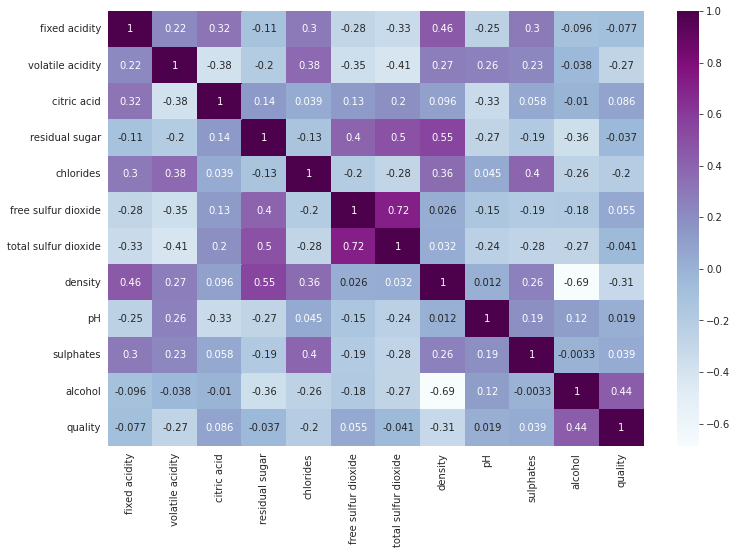

In [ ]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(),cmap='BuPu', annot = True)
plt.show()

Очень большая связь между total sulfur dioxide и free sulfur dioxide. Лучше убрать эту колонку

In [ ]:
df = df.drop('total sulfur dioxide', axis=1)

Взглянем на нулевые значения

In [ ]:
df.isnull().sum()

type                    0
fixed acidity          10
volatile acidity        8
citric acid             3
residual sugar          2
chlorides               2
free sulfur dioxide     0
density                 0
pH                      9
sulphates               4
alcohol                 0
quality                 0
dtype: int64

Заменим нулевые значения медианным

In [ ]:
df = df.fillna(df.median())

In [ ]:
df.isnull().sum()

type                   0
fixed acidity          0
volatile acidity       0
citric acid            0
residual sugar         0
chlorides              0
free sulfur dioxide    0
density                0
pH                     0
sulphates              0
alcohol                0
quality                0
dtype: int64

Обработаем кртегориальные метки

In [ ]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
0,7.0,0.27,0.36,20.7,0.045,45.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   fixed acidity        6497 non-null   float64
 1   volatile acidity     6497 non-null   float64
 2   citric acid          6497 non-null   float64
 3   residual sugar       6497 non-null   float64
 4   chlorides            6497 non-null   float64
 5   free sulfur dioxide  6497 non-null   float64
 6   density              6497 non-null   float64
 7   pH                   6497 non-null   float64
 8   sulphates            6497 non-null   float64
 9   alcohol              6497 non-null   float64
 10  quality              6497 non-null   int64  
 11  type_white           6497 non-null   uint8  
dtypes: float64(10), int64(1), uint8(1)
memory usage: 564.8 KB


Отрисуем на графике важность признаков

In [ ]:
X = df.drop(['quality','best quality'],axis=1)
y = df['best quality']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=22)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(max_depth=3, random_state=22)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

([<matplotlib.axis.YTick at 0x7fc6225613d0>,
 [Text(0, 0, 'fixed acidity'),
  Text(0, 0, 'volatile acidity'),
  Text(0, 0, 'citric acid'),
  Text(0, 0, 'residual sugar'),
  Text(0, 0, 'chlorides'),
  Text(0, 0, 'free sulfur dioxide'),
  Text(0, 0, 'density'),
  Text(0, 0, 'pH'),
  Text(0, 0, 'sulphates'),
  Text(0, 0, 'alcohol'),
  Text(0, 0, 'quality'),
  Text(0, 0, 'type_white')])

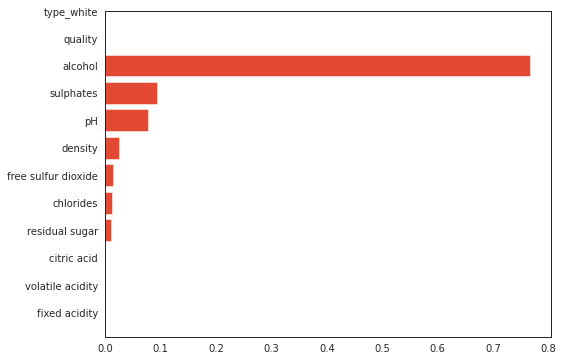

In [ ]:
plt.barh(np.arange(len(regressor.feature_importances_)), sorted(regressor.feature_importances_))
plt.yticks(np.arange(len(df.columns)), df.columns)

Приведем данные к одному маштабу

In [ ]:
norm = MinMaxScaler()

norm_fit = norm.fit(df)
df_scaled = norm_fit.transform(df)
print(df_scaled)

[[0.26446281 0.12666667 0.21686747 ... 0.11594203 0.5        1.        ]
 [0.20661157 0.14666667 0.20481928 ... 0.2173913  0.5        1.        ]
 [0.3553719  0.13333333 0.24096386 ... 0.30434783 0.5        1.        ]
 ...
 [0.20661157 0.28666667 0.07831325 ... 0.43478261 0.5        0.        ]
 [0.17355372 0.37666667 0.07228916 ... 0.31884058 0.33333333 0.        ]
 [0.18181818 0.15333333 0.28313253 ... 0.43478261 0.5        0.        ]]


In [ ]:
df_new = pd.DataFrame(df_scaled,columns=['fixed acidity',
                               'volatile acidity',
                               'citric acid',
                               'residual sugar',
                               'chlorides',
                               'free sulfur dioxide',
                               'density',
                               'pH',
                               'sulphates',
                               'alcohol',
                               'quality',
                               'best quality'])
df_new.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,best quality
0,0.264463,0.126667,0.216867,0.308282,0.059801,0.152778,0.267785,0.217054,0.129213,0.115942,0.5,1.0
1,0.206612,0.146667,0.204819,0.015337,0.066445,0.045139,0.132832,0.449612,0.151685,0.217391,0.5,1.0
2,0.355372,0.133333,0.240964,0.096626,0.068106,0.100694,0.154039,0.418605,0.123596,0.304348,0.5,1.0
3,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.163678,0.364341,0.101124,0.275362,0.5,1.0
4,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.163678,0.364341,0.101124,0.275362,0.5,1.0


И обучим модель логистической регресии

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.974048823400044